
<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://databricks.com/wp-content/uploads/2018/03/db-academy-rgb-1200px.png" alt="Databricks Learning" style="width: 600px">
</div>




# Databricks Platform

Demonstrate basic functionality and identify terms related to working in the Databricks workspace.


##### Objectives
1. Create a new cell
1. Execute code in multiple languages
1. Create markdown cells
1. Read data from DBFS (Databricks File System)
1. Visualize data
1. Install libraries

##### Databricks Notebook Utilities
- Example <a href="https://docs.databricks.com/notebooks/notebooks-use.html#language-magic" target="_blank">magic commands</a>: **`%python`**, **`%sql`**, **`%md`**, **`%fs`**, **`%sh`**, **`%pip`**




### Setup
Run classroom setup to copy Databricks training datasets into your environment.

Use the **`%run`** magic command to run another notebook within a notebook

To run the notebook cell below click on the cell containing the `%run` command, this selects the cell, and then push `Shift + Enter` on your keyboard. Cells can also be run by clicking the arrow in the top right corner of the cell (the arrow will appear when hovering your mouse over the cell).

In [0]:
%run ../Includes/Classroom-Setup

Resetting the learning environment:
| Enumerating serving endpoints...found 0...(0 seconds)
| No action taken

Skipping download of existing archive to "dbfs:/mnt/dbacademy-datasets/large-language-models/v03" 
| Validating local assets:
| | Listing local files...(0 seconds)
| | Validation completed...(0 seconds total)
|
| Skipping the unpacking of datasets to "dbfs:/mnt/dbacademy-users/johnlennyt@gmail.com/large-language-models/datasets" 
|
| Dataset installation completed (0 seconds)



Importing lab testing framework.



Using the "default" schema.

Predefined paths variables:
| DA.paths.working_dir: /dbfs/mnt/dbacademy-users/johnlennyt@gmail.com/large-language-models/working
| DA.paths.user_db:     /dbfs/mnt/dbacademy-users/johnlennyt@gmail.com/large-language-models/working/database.db
| DA.paths.datasets:    /dbfs/mnt/dbacademy-users/johnlennyt@gmail.com/large-language-models/datasets

Setup completed (5 seconds)

The models developed or used in this course are for demonstration and learning purposes only.
Models may occasionally output offensive, inaccurate, biased information, or harmful instructions.


### Create a new Cell

Notebook cells can be created by clicking the "`+`" button that appears when you hover your mouse between two cells, or by using keyboard shortcuts. To use the keyboard shortcuts select any cell and press `A` to insert a cell above the selected cell, or `B` to insert a cell below the selected cell.

In [0]:
# Try creating a cell below me! Click on my cell (not in the text area itself) and then press `B`.




### Execute code in multiple languages

Databricks notbooks support 4 different languages : <a href="https://www.python.org/" target="_blank">Python</a>, <a href="https://www.scala-lang.org/" target="_blank">Scala</a>, <a href="https://en.wikipedia.org/wiki/SQL" target="_blank">SQL</a>, and <a href="https://www.r-project.org/" target="_blank">R</a>. Upon creation of a notebook you'll set a default language for the cells in the notebook to use. The default language of the notebook is displayed in the upper left of your window, to the right of the notebook name.


* Each notebook specifies a default language, in this case **Python**.
* Run the cell below using one of the following options:
  * **CTRL+ENTER** or **CMD+RETURN**
  * **SHIFT+ENTER** or **SHIFT+RETURN** to run the cell and move to the next one
  * Using **Run Cell**, **Run All Above** or **Run All Below** as seen here<br/><img style="box-shadow: 5px 5px 5px 0px rgba(0,0,0,0.25); border: 1px solid rgba(0,0,0,0.25);" src="https://files.training.databricks.com/images/notebook-cell-run-cmd.png"/>

The below cell shows an example of a python command executing.

In [0]:
print("Run default language")

Run default language




But you can also use non-default languages in your notebooks as well! Try running languages specified by their language magic commands: **`%python`**, **`%scala`**, **`%sql`**, **`%r`**.

Below are examples of using magic commands to execute code in **python** and **sql**:

In [0]:
%python
print("Run python")

Run python


In [0]:
%sql
select "Run SQL"

Run SQL
Run SQL





## Create documentation cells
Render cell as <a href="https://www.markdownguide.org/cheat-sheet/" target="_blank">Markdown</a> using the magic command: **`%md`**

Below are some examples of how you can use Markdown to format documentation. Click this cell and press **`Enter`** to view the underlying Markdown syntax.


# Heading 1
### Heading 3
> block quote

1. **bold**
2. *italicized*
3. ~~strikethrough~~

---

- <a href="https://www.markdownguide.org/cheat-sheet/" target="_blank">link</a>
- `code`

```
{
  "message": "This is a code block",
  "method": "https://www.markdownguide.org/extended-syntax/#fenced-code-blocks",
  "alternative": "https://www.markdownguide.org/basic-syntax/#code-blocks"
}
```

![Spark Logo](https://files.training.databricks.com/images/Apache-Spark-Logo_TM_200px.png)

| Element         | Markdown Syntax |
|-----------------|-----------------|
| Heading         | `#H1` `##H2` `###H3` `#### H4` `##### H5` `###### H6` |
| Block quote     | `> blockquote` |
| Bold            | `**bold**` |
| Italic          | `*italicized*` |
| Strikethrough   | `~~strikethrough~~` |
| Horizontal Rule | `---` |
| Code            | ``` `code` ``` |
| Link            | `[text](https://www.example.com)` |
| Image           | `![alt text](image.jpg)`|
| Ordered List    | `1. First items` <br> `2. Second Item` <br> `3. Third Item` |
| Unordered List  | `- First items` <br> `- Second Item` <br> `- Third Item` |
| Code Block      | ```` ``` ```` <br> `code block` <br> ```` ``` ````|
| Table           |<code> &#124; col &#124; col &#124; col &#124; </code> <br> <code> &#124;---&#124;---&#124;---&#124; </code> <br> <code> &#124; val &#124; val &#124; val &#124; </code> <br> <code> &#124; val &#124; val &#124; val &#124; </code> <br>|


## Reading data

When you ran the **Setup** cell at the top of the notebook, some variables were created for you. One of the variables is `DA.paths.datasets` which is the path to datasets which will be used during this course.

One such dataset is located at **`{DA.paths.datasets}/news/labelled_newscatcher_dataset.csv`**. Let's use `pandas` to read that csv file.

In [0]:
import pandas as pd

# Specify the location of the csv file
csv_location = f"{DA.paths.datasets}/news/labelled_newscatcher_dataset.csv"
# Read the dataset
newscatcher = pd.read_csv(csv_location, sep=";")
# Display the datset
newscatcher

,topic,link,domain,published_date,title,lang
0,SCIENCE,https://www.eurekalert.org/pub_releases/2020-0...,eurekalert.org,2020-08-06 13:59:45,A closer look at water-splitting's solar fuel ...,en
1,SCIENCE,https://www.pulse.ng/news/world/an-irresistibl...,pulse.ng,2020-08-12 15:14:19,"An irresistible scent makes locusts swarm, stu...",en
2,SCIENCE,https://www.express.co.uk/news/science/1322607...,express.co.uk,2020-08-13 21:01:00,Artificial intelligence warning: AI will know ...,en
3,SCIENCE,https://www.ndtv.com/world-news/glaciers-could...,ndtv.com,2020-08-03 22:18:26,Glaciers Could Have Sculpted Mars Valleys: Study,en
4,SCIENCE,https://www.thesun.ie/tech/5742187/perseid-met...,thesun.ie,2020-08-12 19:54:36,Perseid meteor shower 2020: What time and how ...,en
...,...,...,...,...,...,...
108769,NATION,https://www.vanguardngr.com/2020/08/pdp-govern...,vanguardngr.com,2020-08-08 02:40:00,PDP governors’ forum urges security agencies t...,en
108770,BUSINESS,https://www.patentlyapple.com/patently-apple/2...,patentlyapple.com,2020-08-08 01:27:12,"In Q2-20, Apple Dominated the Premium Smartpho...",en
108771,HEALTH,https://www.belfastlive.co.uk/news/health/coro...,belfastlive.co.uk,2020-08-12 17:01:00,Coronavirus Northern Ireland: Full breakdown s...,en
108772,ENTERTAINMENT,https://www.thenews.com.pk/latest/696364-paul-...,thenews.com.pk,2020-08-05 04:59:00,Paul McCartney details post-Beatles distress a...,en


We can now use `matplotlib` to plot aggregate data from our dataset.

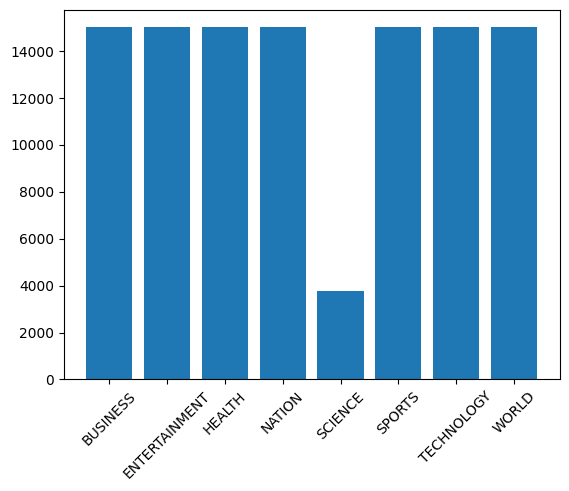

In [0]:
import matplotlib.pyplot as plt

# Count how many articles exist per topic
newscatcher_counts_by_topic = (
    newscatcher
    .loc[:,["topic","title"]]
    .groupby("topic")
    .agg("count")
    .reset_index(drop=False)
)

# Create a bar plot
plt.bar(newscatcher_counts_by_topic["topic"],height=newscatcher_counts_by_topic["title"])
plt.xticks(rotation=45)
plt.show()

The `display()` command will pretty-print a large variety of data types, including Apache Spark DataFrames or Pandas DataFrames.

It will also allow you to make visualizations without writing additional code. For example, after executing the below command click the `+` icon in the results to add a Visualization. Select the **Bar** visualization type and click "Save".

In [0]:
display(newscatcher_counts_by_topic)

topic,title
BUSINESS,15000
ENTERTAINMENT,15000
HEALTH,15000
NATION,15000
SCIENCE,3774
SPORTS,15000
TECHNOLOGY,15000
WORLD,15000


Databricks Runtime (DBR) environments come with many pre-installed libraries (for example, <a href="https://docs.databricks.com/release-notes/runtime/13.1ml.html#python-libraries-on-cpu-clusters"  target="_blank">DBR 13.1 python libraries</a>), but sometimes you'll want to install some additional ones.

Additional libraries can be installed directly onto your cluster in the **Compute** tab, or you can install them with a scope specific to your individual notebook using the `%pip` magic command.

Because sometimes you'll need to restart your python kernel after installing a new library via `%pip` it's considered best practice to put all `%pip` commands at the very top of your notebook.

In [0]:
%pip install nlptest==1.1.0

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


Now we can import the newly installed `nlptest` package.

In [0]:
import nlptest

## Learning More

We like to encourage you to explore the documentation to learn more about the various features of the Databricks platform and notebooks.
* <a href="https://docs.databricks.com/user-guide/index.html" target="_blank">User Guide</a>
* <a href="https://docs.databricks.com/user-guide/notebooks/index.html" target="_blank">User Guide / Notebooks</a>
* <a href="https://docs.databricks.com/administration-guide/index.html" target="_blank">Administration Guide</a>
* <a href="https://docs.databricks.com/release-notes/index.html" target="_blank">Release Notes</a>
* <a href="https://docs.databricks.com/" target="_blank">And much more!</a>

&copy; 2023 Databricks, Inc. All rights reserved.<br/>
Apache, Apache Spark, Spark and the Spark logo are trademarks of the <a href="https://www.apache.org/">Apache Software Foundation</a>.<br/>
<br/>
<a href="https://databricks.com/privacy-policy">Privacy Policy</a> | <a href="https://databricks.com/terms-of-use">Terms of Use</a> | <a href="https://help.databricks.com/">Support</a>